### Dataset

CanadaDataset.xlsx

In [ ]:
# Import module & install dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Dependencies untuk read excel
!pip install openpyxl

# set grid agar dibawah plot (run 1)
plt.rc('axes', axisbelow=True)

     |████████████████████████████████| 242 kB 26.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# set grid agar dibawah plot (run 2)
plt.rcParams['axes.axisbelow'] = True

In [ ]:
# Read Dataset
df = pd.read_excel("CanadaDataset.xlsx", sheet_name='Canada by Citizenship (2)')
df = df.iloc[:, :-8]  # menghapus kolom unnamed43 - 50
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Preprocess

In [ ]:
# menghapus kolom yang tidak diperlukan
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], inplace=True, axis=1)

# mengganti nama kolom
df.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)

# menjadikan nama negara menjadi index
df.set_index('Country', inplace=True)

# menambahkan kolom total imigran pada tahun 1980 - 2013
df['Total'] = df.sum(axis=1)

# menghapus record unkown (benua world)
df = df[:-1]

In [ ]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**--> Penjelasan**

Tahap di atas merupakan tahap preprocessing awal setelah melakukan load data. Preprocessing dibutuhkan dengan tujuan menghasilkan data yang rapi dan sesuai dengan kebutuhan. Tahapan dalam preprocessing dilakukan menyesesuaikan dengan kebutuhan data yang diinginkan dalam proses selanjutnya. Dalam kasus ini, tahapan preprocessing meliputi:
- menghapus kolom yang tidak diperlukan
> pada dataset imigran ke Kanada yang digunakan pada studi kasus ini, beberapa kolom / fitur tidak diperlukan untuk visualisasi data, sehingga kolom tersebut dihapus.
- mengganti nama kolom
> pada dataset yang digunakan, terdapat beberapa nama kolom yang harus disesuaikan agar mendapatkan persepsi yang sama tentang informasi yang akan disampaikan.
- menjadikan nama negara menjadi index
> pada dataset yang digunakan, tidak ada baris data negara yang duplikat. Oleh sebab itu, penggunaan nama negara sebagai index dapat membuat dataset menjadi lebih efisien.
- menambahkan kolom total imigran pada tahun 1980 - 2013
> pada dataset yang digunakan, ditambahkan kolom total imigrasi pada urutan kolom terakhir. Kolom ini berisi jumlah imigran suatu negara ke Kanada sejak tahun 1980 hingga 2013.
-  menghapus record unkown (benua world)
> pada dataset yang digunakan, record unkown dianggap tidak relevan dengan visualisasi yang akan dilakukan dan berpotensi merusak hasil visulisasi. Hal ini disebabkan karena visualisasi yang dilakukan spesifik terhadap negara tertentu, bukan baris gabungan berbagai negara.

# 1. Area Plots

## a. Area Plot pada negara yang memiliki angka imigrasi tinggi ke Kanada (top 5)

In [ ]:
# df.sort_values(['Total'], ascending=False, axis=0)

daftar_tahun = list(map(int, range(1980, 2014)))
df_top5 = df.sort_values(['Total'], ascending=False, axis=0).head()
df_top5 = df_top5[daftar_tahun].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


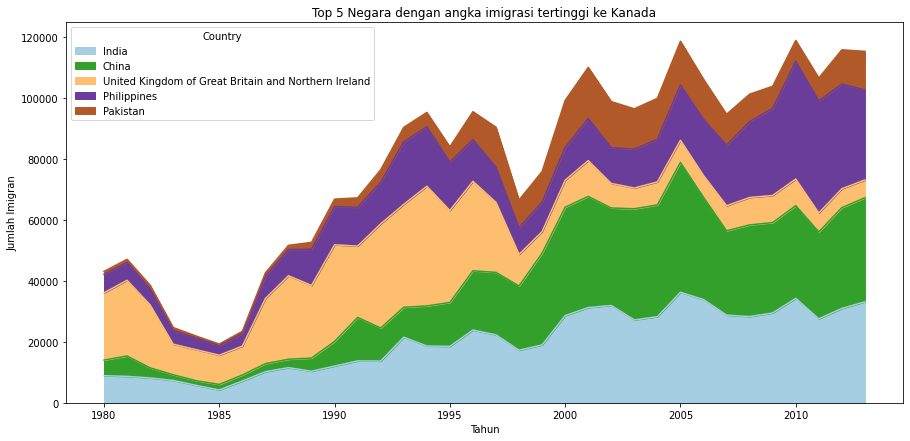

In [ ]:
df_top5.plot(kind='area', figsize=(15, 7), colormap='Paired')

plt.title("Top 5 Negara dengan angka imigrasi tertinggi ke Kanada")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Area Plot untuk 5 negara yang memiliki angka imigrasi tertinggi ke Kanada. Visualisasi Area Plot yang digunakan ialah Stacked Area Plot, sehingga garis diplot satu per satu dan plot terakhir berfungsi sebagai garis dasar. Dengan kata lain, plot yang divisualisasikan ialah akumulasi imigran 5 negara teratas.

Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengurutkan total imigrasi setiap negara dari yang tertinggi, kemudian mengambil 5 baris data teratas. Data yang didapatkan kemudian divisualisasikan ke dalam bentuk Area Plot seperti pada gambar di atas.

Pada dasarnya Area Plot memberikan informasi selayaknya Line Plot, yaitu bagaimana suatu nilai numerik berubah seiring berjalannya waktu (dipengaruhi waktu / time series). Pada kasus ini, hal yang dimaksud ialah perubahan jumlah atau tren imigran suatu negara ke Kanada dari waktu ke waktu. Pada visualisasi diatas, dapat diamati bahwa:

1. India merupakan negara dengan total penduduk yang melakukan imigrasi ke Kanada paling banyak dan cenderung terus meningkat. 
2. Pada lima negara tersebut, cenderung terjadi penurunan jumlah imigrasi yang signifikan hingga tahun 1985 ditinjau sejak tahun 1980. Negara dengan penurunan jumlah imigran yang paling signifikan ialah Inggris.
3. Pada lima negara tersebut, terjadi puncak total imigrasi ke Kanada hingga mencapai 120.000 penduduk pada tahun 2005 dan 2010.
4. Sejak tahun 1995, Inggris mengalami penurunan jumlah imigran yang signifikan dan cenderung terus menurun hingga tahun 2013. 

## b. Area Plot pada negara yang memiliki angka imigrasi tinggi ke Kanada (top 10)

In [ ]:
df_top10 = df.sort_values(['Total'], ascending=False, axis=0).head(10)
df_top10 = df_top10[daftar_tahun].transpose()
df_top10.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588


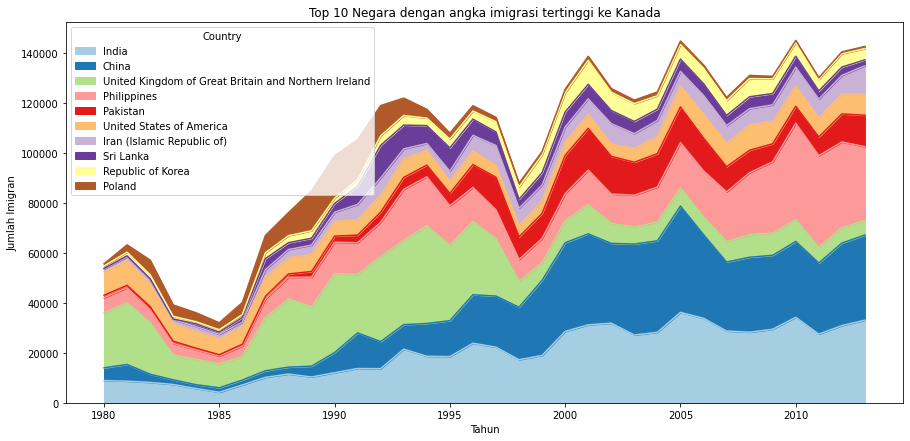

In [ ]:
df_top10.plot(kind='area', figsize=(15, 7), colormap='Paired')

plt.title("Top 10 Negara dengan angka imigrasi tertinggi ke Kanada")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Area Plot untuk 10 negara yang memiliki angka imigrasi tertinggi ke Kanada. Visualisasi Area Plot yang digunakan ialah Stacked Area Plot, sehingga garis diplot satu per satu dan plot terakhir berfungsi sebagai garis dasar. Dengan kata lain, plot yang divisualisasikan ialah akumulasi imigran 10 negara teratas.

Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengurutkan total imigrasi setiap negara dari yang tertinggi, kemudian mengambil 10 baris data teratas. Data yang didapatkan kemudian divisualisasikan ke dalam bentuk Area Plot seperti pada gambar di atas.

Pada dasarnya Area Plot memberikan informasi selayaknya Line Plot, yaitu bagaimana suatu nilai numerik berubah seiring berjalannya waktu (dipengaruhi waktu / time series). Pada kasus ini, hal yang dimaksud ialah perubahan jumlah atau tren imigran suatu negara ke Kanada dari waktu ke waktu. Pada visualisasi diatas, dapat diamati bahwa:

1. India merupakan negara dengan total penduduk yang melakukan imigrasi ke Kanada paling banyak dan cenderung terus meningkat. 
2. Pada sepuluh negara tersebut, total imigrasi ke Kanada semua negara cenderung meningkat dari 1980 hingga 2013.
3. Pada sepuluh negara tersebut, total imigrasi ke Kanada semua negara pada tahun 1985 hingga 1993 terus meningkat secara signifikan.
4. Pada sepuluh negara tersebut, terjadi puncak total imigrasi ke Kanada hingga mencapai 140.000 penduduk pada tahun 2005 dan 2010.

# 2. Histogram

## a. Jumlah persebaran semua negara imigran tahun 2013

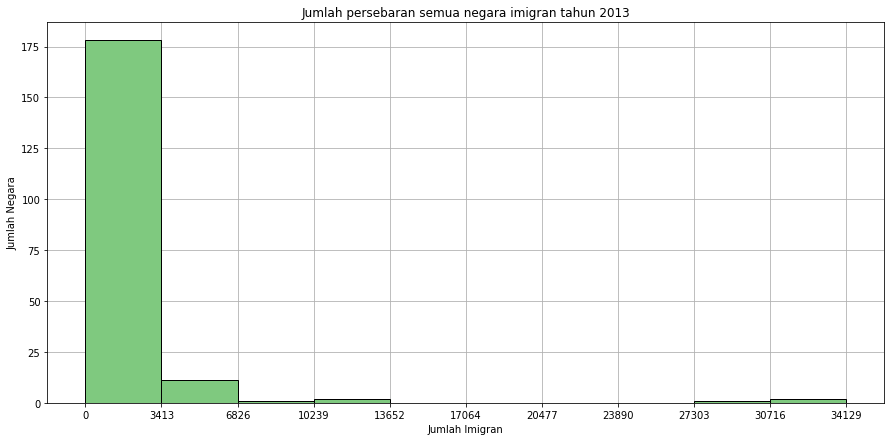

In [ ]:
count_2013, bin_edges_2013 = np.histogram(df[2013])
df[2013].plot(kind='hist', figsize=(15, 7), colormap='Accent', xticks=bin_edges_2013, edgecolor='k')

plt.title("Jumlah persebaran semua negara imigran tahun 2013")
plt.ylabel("Jumlah Negara")
plt.xlabel("Jumlah Imigran")
plt.grid(True, axis='both')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Histogram untuk menunjukkan jumlah persebaran semua negara imigran pada tahun 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan kolom tahun 2013. Data yang didapatkan kemudian divisualisasikan ke dalam bentuk Histogram seperti pada gambar di atas. Namun, terjadi masalah pada xticks atau label pada sumbu X. Label tersebut tidak sesuai dengan data yang ditampilkan sehingga informasi sulit untuk didapatkan. Oleh sebab itu, binning dari data akan dihitung terlebih dahulu menggunakan bantuan library numpy dan hasilnya diplotkan ke dalam sumbu X agar label sesuai dengan Histogram yang ditampilkan dengan tujuan memudahkan keterbacaan.

Histogram merupakan visualisasi yang dapat memberikan informasi mengenai persebaran data. Informasi tersebut didapatkan dengan mengelompokkan data ke dalam beberapa kelompok atau bin kemudian menghitung frekuensinya. Pada kasus ini, data imigrasi setiap negara ke Kanada pada tahun 2013 akan divisualisasikan dalam bentuk Histogram. Pada visualisasi diatas, dapat diamati bahwa:

1. Diketahui bahwa persebaran data tidak normal. Distribusi histogram di atas miring ke kanan (skewed right) dengan sangat ekstrim.
2. Pada tahun 2013, lebih dari 175 negara melakukan imigrasi ke Kanada sejumlah kurang dari 3,413 penduduk.
3. Pada tahun 2013, beberapa negara melakukan imigrasi ke Kanada dalam jumlah sangat besar berkisar antara 27,303 hingga 34,129 penduduk. Jumlah negara tersebut terbilang sangat sedikit dan jauh dari kelompok yang lain (dalam graph), sehinggga disinyalir merupakan outlier atau dimungkinkan merupakan kasus yang tidak biasa. Beberapa faktor yang mungkin memengaruhi kasus tersebut ialah faktor luas wilayah suatu negara beserta kepadatan penduduknya dan faktor kemudahan transportasi.

## b. Jumlah persebaran semua negara imigran tahun 1980

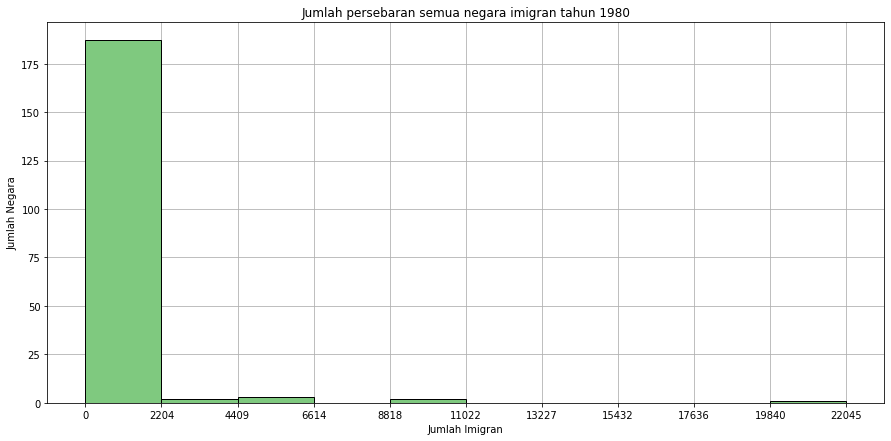

In [ ]:
count_1980, bin_edges_1980 = np.histogram(df[1980])
df[1980].plot(kind='hist', figsize=(15, 7), colormap='Accent', xticks=bin_edges_1980, edgecolor='k')

plt.title("Jumlah persebaran semua negara imigran tahun 1980")
plt.ylabel("Jumlah Negara")
plt.xlabel("Jumlah Imigran")
plt.grid(True, axis='both')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Histogram untuk menunjukkan jumlah persebaran semua negara imigran pada tahun 1980. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan kolom tahun 1980. Data yang didapatkan kemudian divisualisasikan ke dalam bentuk Histogram seperti pada gambar di atas. Namun, terjadi masalah pada xticks atau label pada sumbu X. Label tersebut tidak sesuai dengan data yang ditampilkan sehingga informasi sulit untuk didapatkan. Oleh sebab itu, binning dari data akan dihitung terlebih dahulu menggunakan bantuan library numpy dan hasilnya diplotkan ke dalam sumbu X agar label sesuai dengan Histogram yang ditampilkan dengan tujuan memudahkan keterbacaan.

Histogram merupakan visualisasi yang dapat memberikan informasi mengenai persebaran data. Informasi tersebut didapatkan dengan mengelompokkan data ke dalam beberapa kelompok atau bin kemudian menghitung frekuensinya. Pada kasus ini, data imigrasi setiap negara ke Kanada pada tahun 1980 akan divisualisasikan dalam bentuk Histogram. Pada visualisasi diatas, dapat diamati bahwa:

1. Diketahui bahwa persebaran data tidak normal. Distribusi histogram di atas miring ke kanan (skewed right) dengan sangat ekstrim.
2. Pada tahun 1980, lebih dari 175 negara melakukan imigrasi ke Kanada sejumlah kurang dari 2,204 penduduk.
3. Pada tahun 1980, beberapa negara melakukan imigrasi ke Kanada dalam jumlah sangat besar berkisar antara 19,840 hingga 22,045 penduduk. Jumlah negara tersebut terbilang sangat sedikit dan jauh dari kelompok yang lain (dalam graph), sehinggga disinyalir merupakan outlier atau dimungkinkan merupakan kasus yang tidak biasa. Beberapa faktor yang mungkin memengaruhi kasus tersebut ialah faktor luas wilayah suatu negara beserta kepadatan penduduknya dan faktor kemudahan mendapatkan transportasi pada tahun tersebut.

## c. Perbandingan imigran tahun 1980 dan 2013

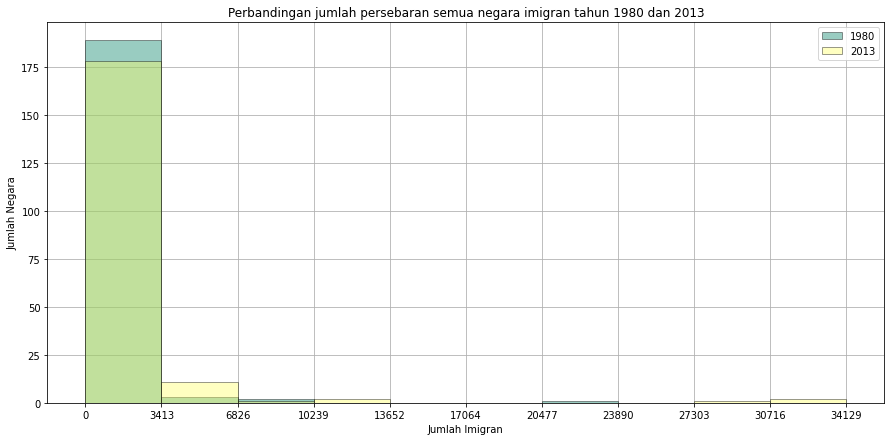

In [ ]:
count_all, bin_edge_all = np.histogram(df[[1980,2013]])
df[[1980,2013]].plot(kind='hist', figsize=(15, 7), colormap='summer', xticks=bin_edge_all, edgecolor='k', alpha=.4)

plt.title("Perbandingan jumlah persebaran semua negara imigran tahun 1980 dan 2013")
plt.ylabel("Jumlah Negara")
plt.xlabel("Jumlah Imigran")
plt.grid(True, axis='both')
plt.legend(loc='best')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Histogram untuk menunjukkan perbandingan jumlah persebaran semua negara imigran pada tahun 1980 dan 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan kolom tahun 1980 dan 2013. Data yang didapatkan kemudian divisualisasikan ke dalam bentuk Histogram seperti pada gambar di atas. Namun, terjadi masalah pada xticks atau label pada sumbu X. Label tersebut tidak sesuai dengan data yang ditampilkan sehingga informasi sulit untuk didapatkan. Oleh sebab itu, binning dari kedua data akan dihitung terlebih dahulu menggunakan bantuan library numpy dan hasilnya diplotkan ke dalam sumbu X agar label sesuai dengan Histogram yang ditampilkan dengan tujuan memudahkan keterbacaan. Selain itu, transparansi kedua plot diatur menjadi 40% saja untuk mengatasi jika ada plot yang bertumpuk.

Histogram merupakan visualisasi yang dapat memberikan informasi mengenai persebaran data. Informasi tersebut didapatkan dengan mengelompokkan data ke dalam beberapa kelompok atau bin kemudian menghitung frekuensinya. Pada kasus ini, data imigrasi setiap negara ke Kanada pada tahun 1980 dan 2013 akan divisualisasikan dalam bentuk Histogram untuk melihat perbandingannya. Pada visualisasi diatas, dapat diamati bahwa:

1. Diketahui bahwa persebaran data kedua tahun tidak normal. Distribusi histogram di atas keduanya miring ke kanan (skewed right) dengan sangat ekstrim.
2. Lebih dari 175 negara melakukan imigrasi ke Kanada sejumlah kurang dari 3,413 penduduk pada tahun 1980 dan 2013. Negara imigran pada tahun 1980 sedikit lebih banyak dibanding tahun 2013.
3. Pada tahun 1980, sejumlah kecil negara melakukan imigrasi ke Kanada dalam jumlah besar berkisar antara 20,477 hingga 23,890 penduduk. Kemudian, terjadi peningkatan pada tahun 2013 dengan jumlah imigran mencapai 27,303 hingga 24,129 penduduk. Salah satu faktor yang mungkin memengaruhi kasus tersebut ialah kemajuan teknologi transportasi sehingga pada tahun 2013 terjadi peningkatan akibat kemudahan mendapatkan transportasi.
4. Jumlah negara pada poin nomor 3 terbilang sangat sedikit dan jauh dari kelompok data yang lain (dalam graph), baik pada tahun 1980 maupun 2013. Oleh sebab itu, data tersebut disinyalir merupakan outlier atau dimungkinkan merupakan kasus yang tidak biasa. Beberapa faktor yang mungkin memengaruhi kasus tersebut ialah faktor luas wilayah suatu negara beserta kepadatan penduduknya dan faktor kemudahan mendapatkan transportasi pada tahun tersebut.

# 3. Bar Charts

## a. Jumlah imigran Islandia ke Kanada dari tahun 1980 - 2013

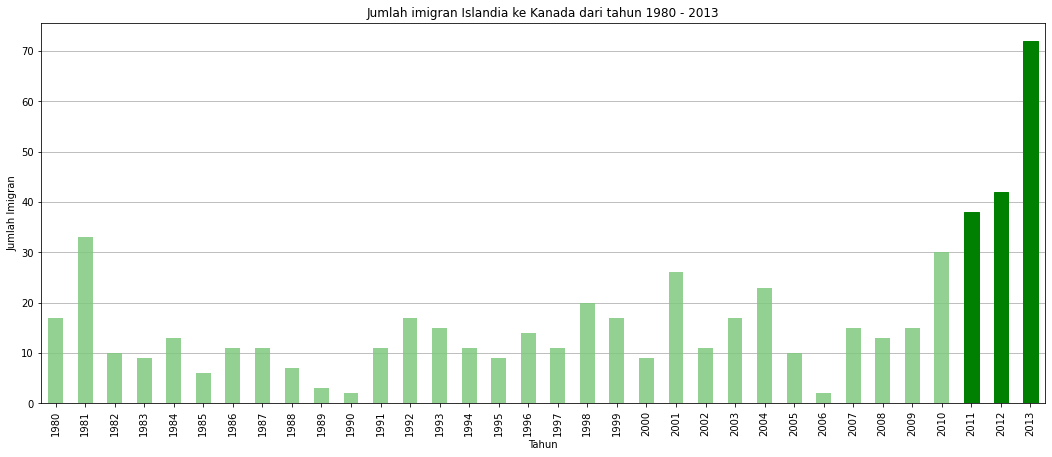

In [ ]:
bar = df.loc['Iceland', daftar_tahun].plot(kind='bar', figsize=(18, 7), colormap='Accent')

# memberikan highlight
highlight = np.arange(2011,2014) % 1980
[bar.get_children()[i].set_color('green') for i in highlight]
non_highlight = np.setdiff1d(daftar_tahun, np.arange(2011,2014)) % 1980
[bar.get_children()[i].set_alpha(0.85) for i in non_highlight]

plt.title("Jumlah imigran Islandia ke Kanada dari tahun 1980 - 2013")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")
plt.grid(True, axis='y')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Bar Plot untuk menunjukkan jumlah penduduk Islandia yang melakukan imigrasi ke Kanada sejak tahun 1980 hingga 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan index negara Islandia dan kolom tahun 1980 hingga 2013. Kemudian, data yang akan diberikan highlight pada visualisasi akan diberikan warna yang lebih terang, sedangkan data yang bukan highlight akan di-set atau diatur transparansinya menjadi 85%. Hal tersebut dimaksudkan untuk memberikan perhatian khusus pada visualisasi yang diberikan.

Bar Plot merupakan visualisasi yang digunakan untuk membandingkan dua atau lebih nilai atau membandingkan perubahan nilai tersebut dari waktu ke waktu. Pada kasus ini, Bar Plot ditujukan untuk memvisualisasikan perbandingan jumlah imigrasi penduduk Islandia ke Kanada dari waktu ke waktu. Pada visualisasi di atas, dapat diamat bahwa:

1. Di Islandia, pada 3 tahun terakhir (2011 - 2013) terjadi peningkatan jumlah imigrasi penduduk dan mencetak angka tertinggi dibandingkan tahun-tahun sebelumnya.
2. Di Islandia, sebelum 3 tahun terakhir (1980 - 2010), angka imigrasi cenderung fluktuatif atau berubah-ubah.
3. Angka imigrasi penduduk Islandia ke Kanada dapat dikatakan sangat rendah. Hal ini dapat diperhatikan pada skala sumbu Y, dimana angka maksimum label hanya mencapai 70 penduduk saja.

## b. Jumlah imigran China ke Kanada dari tahun 1980 - 2013

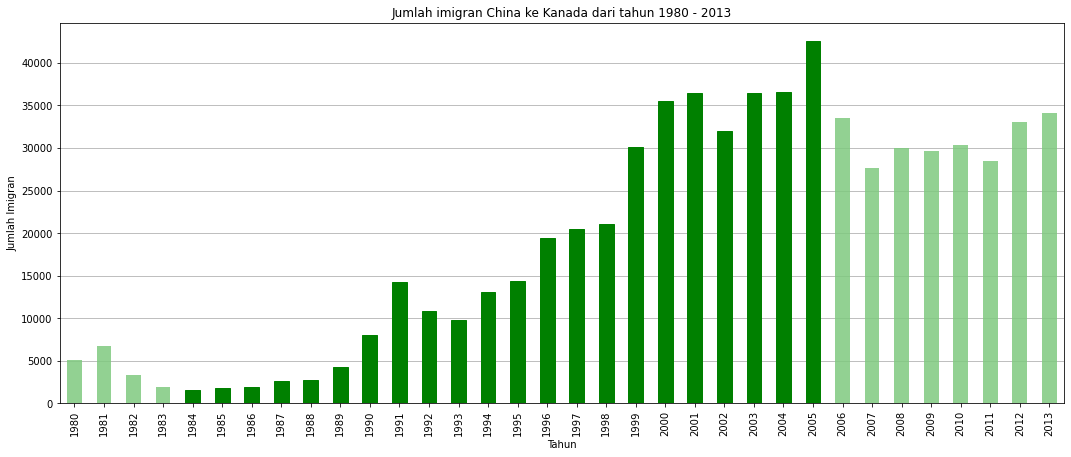

In [ ]:
bar = df.loc['China', daftar_tahun].plot(kind='bar', figsize=(18, 7), colormap='Accent')

# memberikan highlight
highlight = np.arange(1984,2006) % 1980
[bar.get_children()[i].set_color('green') for i in highlight]
non_highlight = np.setdiff1d(daftar_tahun, np.arange(1984,2006)) % 1980
[bar.get_children()[i].set_alpha(0.85) for i in non_highlight]

plt.title("Jumlah imigran China ke Kanada dari tahun 1980 - 2013")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")
plt.grid(True, axis='y')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Bar Plot untuk menunjukkan jumlah penduduk China yang melakukan imigrasi ke Kanada sejak tahun 1980 hingga 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan index negara China dan kolom tahun 1980 hingga 2013. Kemudian, data yang akan diberikan highlight pada visualisasi akan diberikan warna yang lebih terang, sedangkan data yang bukan highlight akan di-set atau diatur transparansinya menjadi 85%. Hal tersebut dimaksudkan untuk memberikan perhatian khusus pada visualisasi yang diberikan.

Bar Plot merupakan visualisasi yang digunakan untuk membandingkan dua atau lebih nilai atau membandingkan perubahan nilai tersebut dari waktu ke waktu. Pada kasus ini, Bar Plot ditujukan untuk memvisualisasikan perbandingan jumlah imigrasi penduduk China ke Kanada dari waktu ke waktu. Pada visualisasi di atas, dapat diamat bahwa:

1. Pada tahun 1984 - 2005, angka imigrasi penduduk China ke Kanada cenderung terus meningkat.
2. Setelah tahun 2005, angka imigrasi penduduk China ke Kanada cenderung stabil sekitar 30,000 penduduk.
3. Angka imigrasi penduduk Islandia ke Kanada dapat dikatakan sangat tinggi. Hal ini dapat diperhatikan pada skala sumbu Y, dimana angka maksimum label mencapai 40,000 penduduk. Salah satu faktor yang mungkin memengaruhi kasus tersebut ialah karena China merupakan salah satu negara yang terkenal padat penduduk.

## c. Perbandingan perwakilan Eropa (Islandia) dan perwakilan Asia (China) ke Kanada dari tahun 1980 - 2013

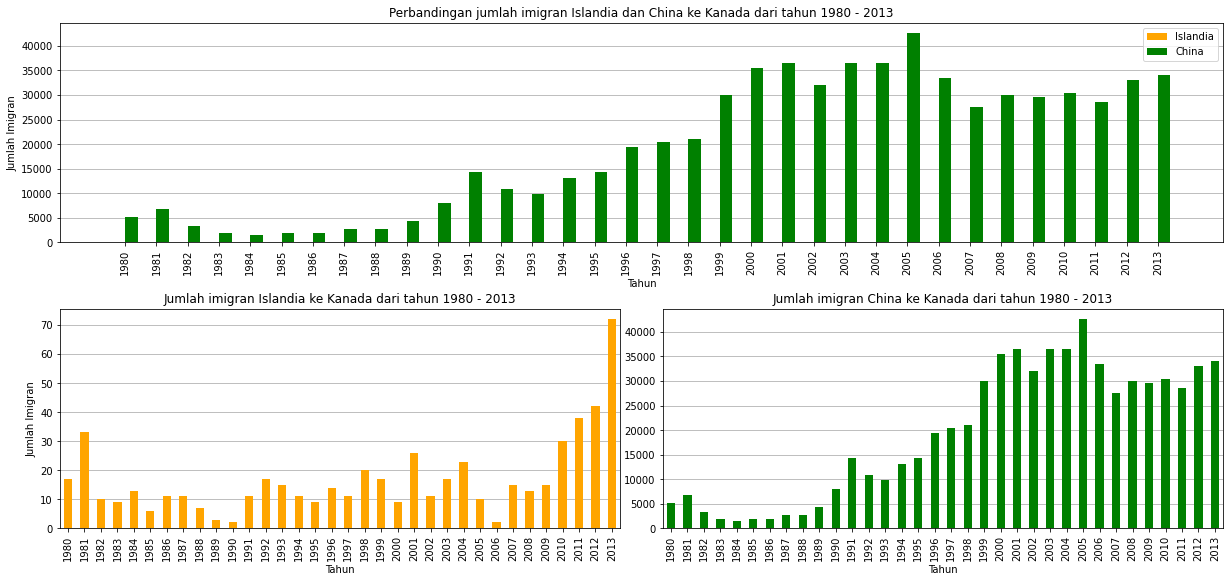

In [ ]:
fig = plt.figure(figsize=(30,20))
gs = fig.add_gridspec(2,2)

# plot 1
ax1 = fig.add_subplot(gs[0, :])
X_axis = np.arange(len(daftar_tahun))
ax1.bar(X_axis - 0.2, df.loc['Iceland', daftar_tahun], 0.4, label = 'Islandia', color='orange')
ax1.bar(X_axis + 0.2, df.loc['China', daftar_tahun], 0.4, label = 'China', color='green')
ax1.set_xticks(X_axis, daftar_tahun, rotation=90)
ax1.set_title("Perbandingan jumlah imigran Islandia dan China ke Kanada dari tahun 1980 - 2013")
ax1.set_ylabel("Jumlah Imigran")
ax1.set_xlabel("Tahun")
ax1.legend()
ax1.grid(True, axis='y')

# plot 2
ax2 = fig.add_subplot(gs[1, 0])
ax2 = df.loc['Iceland', daftar_tahun].plot(kind='bar', figsize=(17, 8), color='orange')
ax2.set_title("Jumlah imigran Islandia ke Kanada dari tahun 1980 - 2013")
ax2.set_ylabel("Jumlah Imigran")
ax2.set_xlabel("Tahun")
ax2.grid(True, axis='y')

# plot 3
ax3 = fig.add_subplot(gs[1, 1])
ax3 = df.loc['China', daftar_tahun].plot(kind='bar', figsize=(17, 8), color='green')
ax3.set_title("Jumlah imigran China ke Kanada dari tahun 1980 - 2013")
# ax3.set_ylabel("Jumlah Imigran")
ax3.set_xlabel("Tahun")
ax3.grid(True, axis='y')


plt.tight_layout(pad=0.4)
plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan Bar Plot untuk menunjukkan perbandingan jumlah penduduk Islandia dan China yang melakukan imigrasi ke Kanada sejak tahun 1980 hingga 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan index negara Islandia dan China serta kolom tahun 1980 hingga 2013. 

Bar Plot yang divisualisasikan terdiri dari 3 graph. Graph pertama merupakan Grouped Bar Plot yang menunjukkan perbandingan imigran Islandia dan China. Sedangkan graph kedua dan ketiga masing masing menunjukkan Bar Plot untuk imigran tiap negara.

Pada visualisasi di atas, dapat diamati bahwa:

1. Jumlah imigrasi penduduk Islandia dan China ke Kanada tidak dapat dibandingkan. Hal ini disebabkan karena adanya perbedaan jumlah imigran yang sangat jauh antara kedua negara. Di Islandia, label sumbu Y jumlah penduduk hanya mencapai 70 penduduk. Sedangkan di China, label sumbu Y jumlah penduduk mencapai 40,000 penduduk. Oleh sebab itu, perbedaan yang sangat besar tersebut mengakibatkan visualisasi seolah-olah tidak menampilkan bar plot untuk negara Islandia.

#### Perbandingan perwakilan Eropa (Inggris) dan perwakilan Asia (China) ke Kanada dari tahun 1980 - 2013 [sebagai komparasi plot Eropa-Islandia & Asia-China]

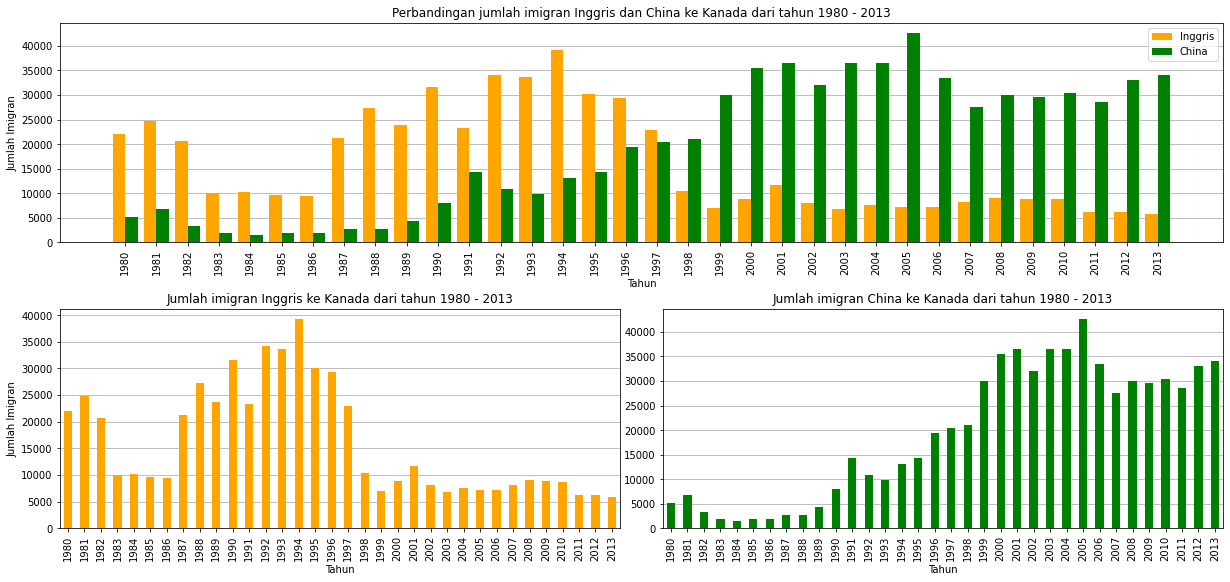

In [ ]:
fig = plt.figure(figsize=(30,20))
gs = fig.add_gridspec(2,2)

# plot 1
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(X_axis - 0.2, df.loc['United Kingdom of Great Britain and Northern Ireland', daftar_tahun], 0.4, label = 'Inggris', color='orange')
ax1.bar(X_axis + 0.2, df.loc['China', daftar_tahun], 0.4, label = 'China', color='green')
ax1.set_xticks(X_axis, daftar_tahun, rotation=90)
ax1.set_title("Perbandingan jumlah imigran Inggris dan China ke Kanada dari tahun 1980 - 2013")
ax1.set_ylabel("Jumlah Imigran")
ax1.set_xlabel("Tahun")
ax1.legend()
ax1.grid(True, axis='y')

# plot 2
ax2 = fig.add_subplot(gs[1, 0])
ax2 = df.loc['United Kingdom of Great Britain and Northern Ireland', daftar_tahun].plot(kind='bar', figsize=(17, 8), color='orange')
ax2.set_title("Jumlah imigran Inggris ke Kanada dari tahun 1980 - 2013")
ax2.set_ylabel("Jumlah Imigran")
ax2.set_xlabel("Tahun")
ax2.grid(True, axis='y')

# plot 3
ax3 = fig.add_subplot(gs[1, 1])
ax3 = df.loc['China', daftar_tahun].plot(kind='bar', figsize=(17, 8), color='green')
ax3.set_title("Jumlah imigran China ke Kanada dari tahun 1980 - 2013")
# ax3.set_ylabel("Jumlah Imigran")
ax3.set_xlabel("Tahun")
ax3.grid(True, axis='y')


plt.tight_layout(pad=0.4)
plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan Bar Plot untuk menunjukkan perbandingan jumlah penduduk Inggris dan China yang melakukan imigrasi ke Kanada sejak tahun 1980 hingga 2013. Visualisasi ini dimaksudkan sebagai komparasi dengan studi kasus sebelumnya, yaitu perbandingan jumlah penduduk Islandia dan China yang melakukan imigrasi ke Kanada sejak tahun 1980 hingga 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa pengambilan index negara Inggris dan China serta kolom tahun 1980 hingga 2013. 

Bar Plot yang divisualisasikan terdiri dari 3 graph. Graph pertama merupakan Grouped Bar Plot yang menunjukkan perbandingan imigran Inggis dan China. Sedangkan graph kedua dan ketiga masing masing menunjukkan Bar Plot untuk imigran tiap negara.

Pada visualisasi di atas, dapat diamati bahwa:

1. Jumlah imigrasi penduduk Inggris dan China ke Kanada dapat dibandingkan. Hal ini disebabkan karena adanya perbedaan jumlah imigran yang sedikit antara kedua negara. Label sumbu Y jumlah penduduk pada kedua negara sama-sama pada angka 40,000 penduduk.
2. Di Inggris, angka imigrasi cenderung mengalami penurunan seiring berjalannya waktu. Sebaliknya, angka imigrasi di China cenderung mengalami peningkatan seiring berjalannya waktu. 

# 4. Pie Charts

## a. Imigran berdasarkan benua

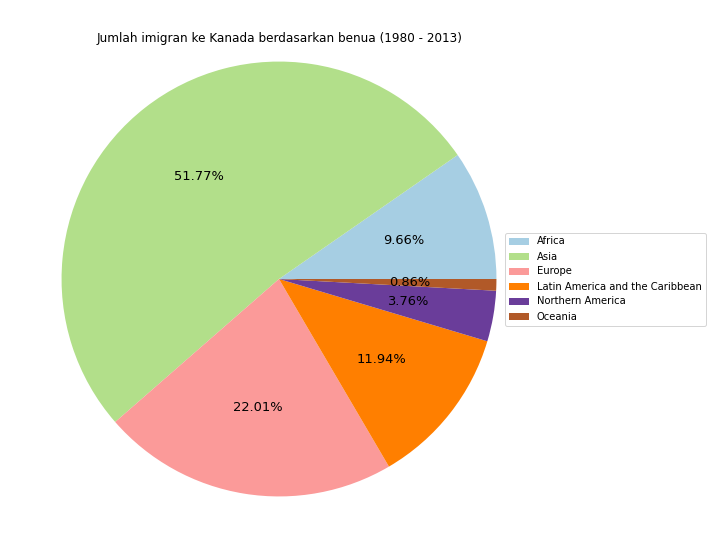

In [ ]:
df.groupby('Continent', axis=0).sum()['Total'].plot(kind='pie', autopct="%.2f%%", figsize=(10, 10),
        colormap='Paired', legend=True, labeldistance=None, textprops={'fontsize': 13})

plt.title("Jumlah imigran ke Kanada berdasarkan benua (1980 - 2013)", y=.925)
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 0.5), loc='center')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Pie Chart untuk menunjukkan jumlah imigran ke Kanada pada tahun 1980 - 2013 dikelompokkan berdasarkan benua. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengelompokkan data berdasarkan kolom Benua dan hasilnya dijumlahkan. Data yang didapatkan kemudian hanya diambil kolom Total saja dan dilanjutkan dengan proses visualisasi.

Pie Chart merupakan visualisasi yang digunakan untuk menunjukkan proporsi atau suatu bagian terhadap keseluruhan. Pada kasus ini, hal yang dimaksud ialah proporsi imigrasi penduduk setiap benua ke Kanada. Pada visualisasi di atas, dapat diamati bahwa:

1. Imigran di Kanada sebagian besar berasal dari Benua Asia. Hal ini dibuktikan dengan besar proporsi Benua Asia yang mencapai 51,77%.
2. Imigran di Kanada paling sedikit berasal dari Benua Oseania. Hal ini dibuktikan dengan besar proporsi Benua Oseania yang tidak mencapai 1% atau tepatnya 0,86%. Salah satu faktor yang mungkin memengaruhi kasus ini ialah jumlah populasi di benua ini, mengingat benua ini memiliki luas daratan terkecil.

## b. Imigran berdasarkan Developing Country atau Developed Country

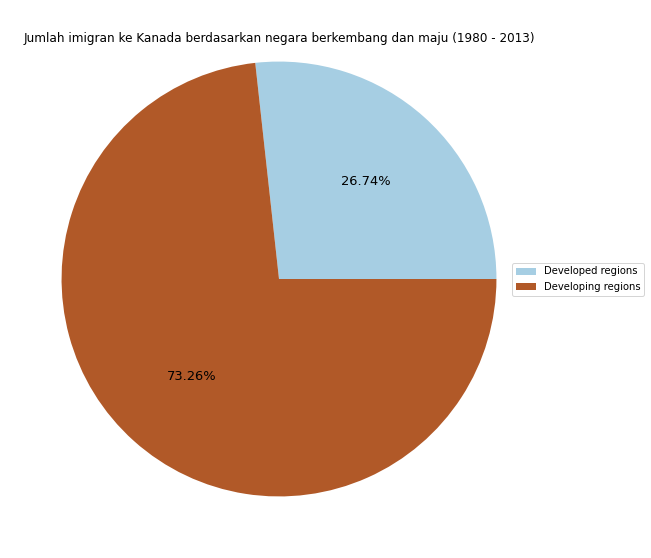

In [ ]:
df.groupby('DevName', axis=0).sum()['Total'].plot(kind='pie', autopct="%.2f%%", figsize=(10, 10), 
        colormap='Paired', legend=True, labeldistance=None, textprops={'fontsize': 13})

plt.title("Jumlah imigran ke Kanada berdasarkan negara berkembang dan maju (1980 - 2013)", y=.925)
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center')

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Pie Chart untuk menunjukkan jumlah imigran ke Kanada pada tahun 1980 - 2013 dikelompokkan berdasarkan kesejahteraan negara (diukur berdasarkan negara maju atau berkembang). Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengelompokkan data berdasarkan kolom DevName dan hasilnya dijumlahkan. Data yang didapatkan kemudian hanya diambil kolom Total saja dan dilanjutkan dengan proses visualisasi.

Pie Chart merupakan visualisasi yang digunakan untuk menunjukkan proporsi atau suatu bagian terhadap keseluruhan. Pada kasus ini, hal yang dimaksud ialah proporsi imigrasi penduduk setiap negara maju atau berkembang ke Kanada. Pada visualisasi di atas, dapat diamati bahwa:

1. Imigran di Kanada sebagian besar berasal dari Negara Berkembang. Hal ini dibuktikan dengan besar proporsi Negara Berkembang yang mencapai 73,26%. Salah satu faktor yang mungkin memengaruhi kasus ini ialah karena Kanada tergolong Negara Maju. Faktanya, negara-negara maju di Benua Eropa dan Amerika Serikat sering menjadi tujuan imigrasi sebab negara tersebut menjanjikan kebebasan dan peluang untuk berkembang.
2. Imigran di Kanada paling sedikit berasal dari Negara Maju. Hal ini dibuktikan dengan besar proporsi Negara Maju yang hanya mencapai 26,74%.

# 5. Box Plots

## a. Distribusi imigran Jepang ke Kanada tahun 1980 - 2013

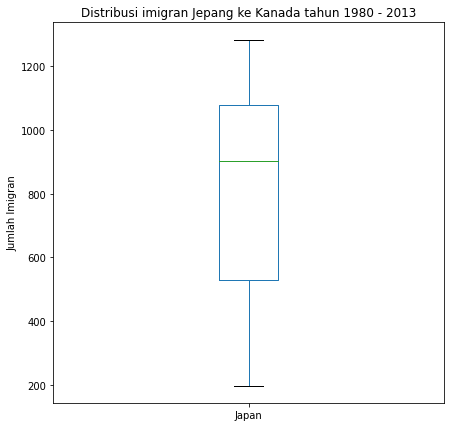

In [ ]:
df.loc[['Japan'], daftar_tahun].transpose().plot(kind='box', figsize=(7, 7))

plt.title("Distribusi imigran Jepang ke Kanada tahun 1980 - 2013")
plt.ylabel("Jumlah Imigran")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Box Plot untuk menunjukkan distribusi imigrasi penduduk Jepang ke Kanada pada tahun 1980 - 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengambil index Negara Jepang dan dan kolom tahun 1980 hingga 2013. Kemudian dilanjutkan dengan proses visualisasi.

Box Plot merupakan visualisasi yang digunakan untuk menunjukkan distribusi suatu data berdasarkan five-number summary yang terdiri dari minimum, kuartil pertama (Q1), median, kuartil ketiga (Q3), dan maksimum. Selain itu, Box Plot juga dapat menginformasikan mengenai ada tidaknya outlier atau data pencilan. Pada visualisasi di atas, dapat diamati bahwa:

1. Distribusi data migrasi penduduk Jepang ke Kanada miring ke kiri (skewed left). Hal ini dibuktikan dengan bagian terpanjang dari box (Q1 ke median) berada di bawah median. Dengan demikian, dapat dikatakan bahwa data tidak simetris.
2. Pada distribusi di atas, bagian Q1 ke median lebih panjang dari yang lain, ini menunjukkan bahwa rentang nilai data di bagian tersebut lebih luas atau data tersebar. Sedangkan pada bagian median ke Q3 lebih pendek, ini menunjukkan bahwa rentang nilai data di bagian tersebut lebih sempit atau data lebih padat.
3. Tidak ada data outlier atau pencilan pada persebaran imigrasi penduduk Jepang ke Kanada. Hal ini dibuktikan dengan tidak adanya poin individu yang berada diluar batas whiskers.

## b. Distribusi imigran India ke Kanada tahun 1980 - 2013

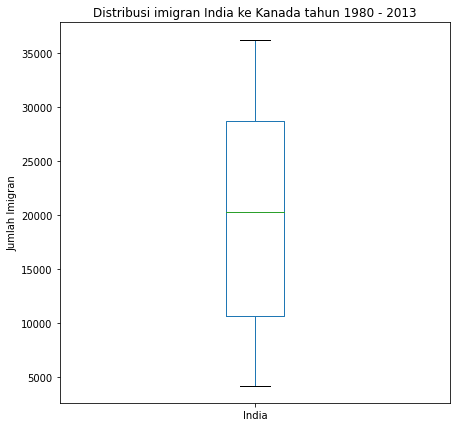

In [ ]:
df.loc[['India'], daftar_tahun].transpose().plot(kind='box', figsize=(7, 7))

plt.title("Distribusi imigran India ke Kanada tahun 1980 - 2013")
plt.ylabel("Jumlah Imigran")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Box Plot untuk menunjukkan distribusi imigrasi penduduk India ke Kanada pada tahun 1980 - 2013. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengambil index Negara India dan dan kolom tahun 1980 hingga 2013. Kemudian dilanjutkan dengan proses visualisasi.

Box Plot merupakan visualisasi yang digunakan untuk menunjukkan distribusi suatu data berdasarkan five-number summary yang terdiri dari minimum, kuartil pertama (Q1), median, kuartil ketiga (Q3), dan maksimum. Selain itu, Box Plot juga dapat menginformasikan mengenai ada tidaknya outlier atau data pencilan. Pada visualisasi di atas, dapat diamati bahwa:

1. Distribusi data migrasi penduduk India ke Kanada sedikit miring ke kiri (skewed left). Hal ini dibuktikan dengan bagian terpanjang dari box (Q1 ke median) berada di bawah median. Dengan demikian, dapat dikatakan bahwa data nyaris simetris.
2. Tidak ada data outlier atau pencilan pada persebaran imigrasi penduduk India ke Kanada. Hal ini dibuktikan dengan tidak adanya poin individu yang berada diluar batas whiskers.

# 6. Scatter Plots

## a. Total tahunan jumlah imigran dari 1980 - 2013

In [ ]:
df_year = df[daftar_tahun].transpose()
df_year.index.name = 'year'
df_year['total'] = df_year.sum(axis=1)
df_total = df_year['total'].reset_index(level=0)
df_total

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


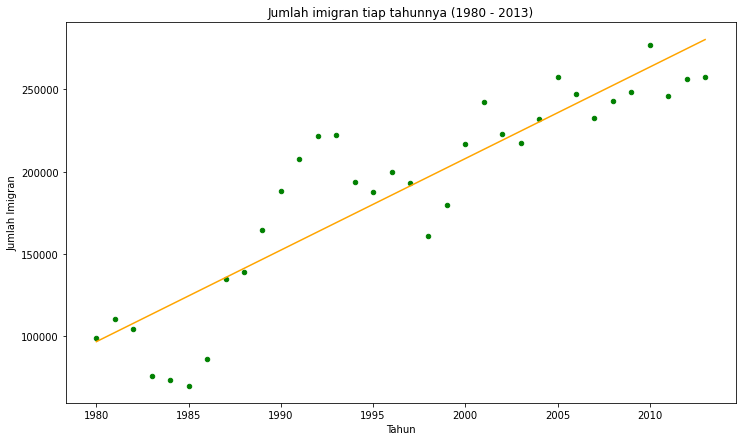

In [ ]:
# plotting scatter
df_total.plot(kind='scatter', figsize=(12, 7), x='year', y='total', color='green')

# mendapatkan m (slope) and b(intercept) dari garis regresi linear
m, b = np.polyfit(df_total['year'], df_total['total'], 1)

# plotting warna
plt.plot(df_total['year'], m*df_total['year']+b, color='orange')

plt.title("Jumlah imigran tiap tahunnya (1980 - 2013)")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Scatter Plot untuk menunjukkan persebaran dari total tahunan imigrasi penduduk dari berbagai negara ke Kanada. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengambil kolom tahun 1980 - 2013. Kolom tersebut kemudian dijumlahkan setiap tahunnya dan divisualisasikan. Tidak sampai disitu, hasil Scatter Plot kemudian ditambahkan dengan garis regresi yang mewakili setiap titik pada visualisasi. Garis ini dibutuhkan untuk memberikan highlight atau menyorot informasi yang dapat diambil dari visualisasi.

Scatter Plot merupakan visualisasi yang digunakan untuk menunjukkan kekuatan, arah, dan bentuk hubungan dari dua variabel kuantitatif. Pada kasus ini, dua variabel tersebut ialah tahun dan total setiap tahun. Pada visualisasi di atas, dapat diamati bahwa:

1. Total tahunan imigran tiap tahunnya cenderung naik.
2. Tahun dan jumlah imigran memiliki berkorelasi positif, sehingga seiring berjalannya waktu (tahun) maka jumlah imigran juga akan semakin meningkat. Hal ini dibuktikan dengan garis regresi yang naik ke atas.

## b. Rata-rata tahunan jumlah imigran dari 1980 - 2013

In [ ]:
df_year['rata-rata'] = df_year['total'] / (df_year.shape[1] - 1)
df_mean = df_year['rata-rata'].reset_index(level=0)
df_mean

,year,rata-rata
0,1980,508.394872
1,1981,566.989744
2,1982,534.723077
3,1983,387.435897
4,1984,376.497436
5,1985,358.861538
6,1986,441.271795
7,1987,691.133333
8,1988,714.389744
9,1989,843.241026


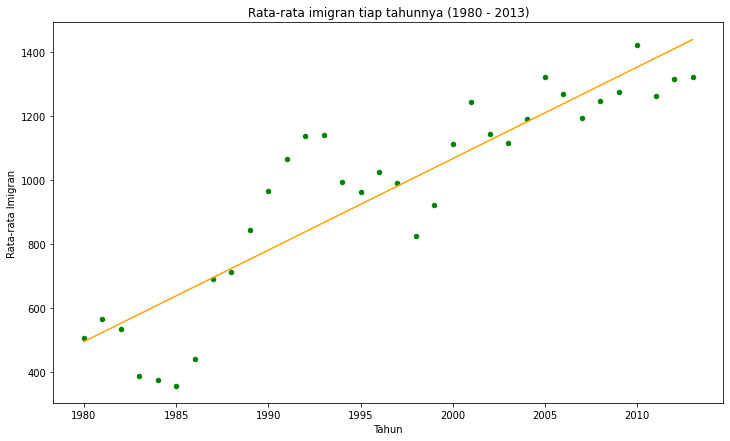

In [ ]:
# plotting scatter
df_mean.plot(kind='scatter', figsize=(12, 7), x='year', y='rata-rata', color='green')

# mendapatkan m (slope) and b(intercept) dari garis regresi linear
m, b = np.polyfit(df_mean['year'], df_mean['rata-rata'], 1)

# plotting warna
plt.plot(df_mean['year'], m*df_mean['year']+b, color='orange')

plt.title("Rata-rata imigran tiap tahunnya (1980 - 2013)")
plt.ylabel("Rata-rata Imigran")
plt.xlabel("Tahun")

plt.show()

**--> Penjelasan**

Pada studi kasus ini, akan ditampilkan sebuah Scatter Plot untuk menunjukkan persebaran dari rata-rata tahunan imigrasi penduduk dari berbagai negara ke Kanada. Data untuk visualisasi didapatkan melalui preprocessing lanjutan berupa mengambil kolom tahun 1980 - 2013. Kolom tersebut kemudian dirata-rata setiap tahunnya dan divisualisasikan. Tidak sampai disitu, hasil Scatter Plot kemudian ditambahkan dengan garis regresi yang mewakili setiap titik pada visualisasi. Garis ini dibutuhkan untuk memberikan highlight atau menyorot informasi yang dapat diambil dari visualisasi.

Scatter Plot merupakan visualisasi yang digunakan untuk menunjukkan kekuatan, arah, dan bentuk hubungan dari dua variabel kuantitatif. Pada kasus ini, dua variabel tersebut ialah tahun dan rata-rata setiap tahun. Pada visualisasi di atas, dapat diamati bahwa:

1. Rata-rata tahunan imigran tiap tahunnya cenderung naik.
2. Tahun dan rata-rata imigran memiliki berkorelasi positif, sehingga seiring berjalannya waktu (tahun) maka rata-rata imigran juga akan semakin meningkat. Hal ini dibuktikan dengan garis regresi yang naik ke atas.

***

<center><h3>SELESAI</h3></center>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2dde367c-bfe6-49eb-b791-d5c19f996f91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>